In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

## <b>Ejercicio 1 </b>

In [2]:
def colorear(imagen, color):
    if (color==1) | (color==2) | (color==3) | (color==10) | (color==20) | (color==30):
        img = cv2.imread(imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        alto = img.shape[0]
        ancho = img.shape[1]
        lienzo = np.zeros((alto, ancho,3))

        for i in range(0, alto):
            for j in range(0, ancho):
                pixel = img[i, j]

                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]

                if color == 1:
                    lienzo[i, j] = [blue, 0, 0]
                elif color ==2:
                    lienzo[i, j] = [0,green, 0]
                elif color ==3:
                    lienzo[i, j] = [0, 0, red]
                elif color ==10:
                    lienzo[i, j] = [0, green, red]
                elif color ==20:
                    lienzo[i, j] = [blue, green, 0]
                elif color ==30:
                    lienzo[i, j] = [blue, 0, red]
        
        cv2.imwrite('ej1_colorear.jpg', lienzo)
        monocromo = cv2.imread('ej1_colorear.jpg')
        monocromo = cv2.cvtColor(monocromo, cv2.COLOR_BGR2RGB)
        plt.imshow(monocromo)
        plt.show()
    else:
        print("""Ingresa valores que sean 1 = azul, 2 = verde, 3 = rojo, 
        10 = rojo y verde, 20 = verde y azul, 30 = azul y rojo""")

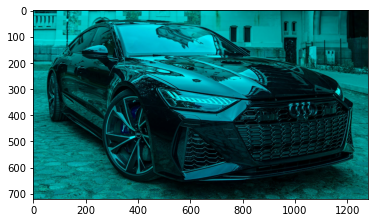

In [3]:
colorear('Audi.jpg', 20)

## <b> Ejercicio 2 </b>

In [4]:
def trans_color(url_1, url_2, url_3):
    """
    Función que transforma una escala de grises a color. 
    Las 3 imagenes deben contener el mismo nivel de pixeles
    """
    img_b = cv2.imread(url_1)
    img_g = cv2.imread(url_2)
    img_r = cv2.imread(url_3)

    alto = img_b.shape[0]
    ancho = img_b.shape[1]
    lienzo = np.zeros((alto, ancho,3))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel_b = img_b[i, j]
            pixel_g = img_g[i, j]
            pixel_r = img_r[i, j]

            blue = pixel_b[2]
            green = pixel_g[1]
            red = pixel_r[0]

            lienzo[i, j] = [blue, green, red]
    cv2.imwrite('ej2_escala a color.jpg', lienzo)
    monocromo = cv2.imread('ej2_escala a color.jpg')
    monocromo = cv2.cvtColor(monocromo, cv2.COLOR_BGR2RGB)
    plt.imshow(monocromo)
    plt.show()

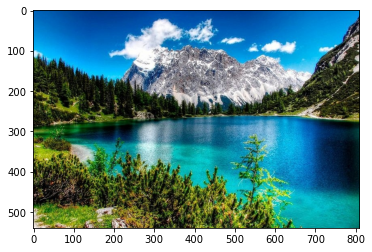

In [5]:
trans_color('imagen1/imagen1_salida_gray_azul.jpg', 'imagen1/imagen1_salida_gray_verde.jpg', 'imagen1/imagen1_salida_gray_rojo.jpg' )

## <b> Ejercicio 3 </b>

In [6]:
def escala_grises_3D(imagen):
    for x in range(3):
        img = cv2.imread(imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        alto = img.shape[0]
        ancho = img.shape[1]
        media_ponderada = np.zeros((alto, ancho,1))


        for i in range(0, alto):
            for j in range(0, ancho):
                pixel = img[i, j]

                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]

                if x==0:
                    media_ponderada[i, j] = int(0.40*blue + 0.60*green + 0.20*red)
                elif x==1:
                    media_ponderada[i, j] = int(0.20*blue + 0.50*green + 0.08*red)
                elif x==2:
                    media_ponderada[i, j] = int(0.10*blue + 0.40*green + 0.05*red)


        cv2.imwrite(f'''ej3_D{x+1}gris_ponderado.jpg''', media_ponderada)
        gris = cv2.imread(f'''ej3_D{x+1}gris_ponderado.jpg''')
        gris = cv2.cvtColor(gris, cv2.COLOR_BGR2RGB)
        plt.imshow(gris)
        plt.show()

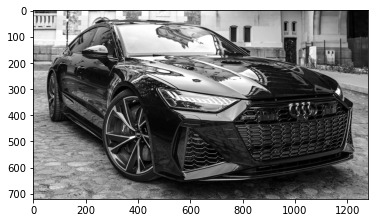

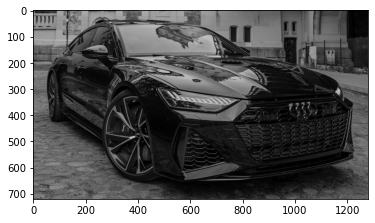

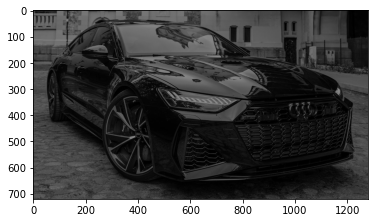

In [7]:
escala_grises_3D('Audi.jpg')

## <b> Ejercicio 4 </b>

In [8]:
def histograma(imagen):
    img = cv2.imread(imagen)
    color = ('b','g','r')

    alto = img.shape[0]
    ancho = img.shape[1]
    media_ponderada = np.zeros((alto, ancho,1))
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            media_ponderada[i, j] = int(0.299*blue + 0.587*green + 0.114*red)
    cv2.imwrite('ej4_gris_ponderado.jpg', media_ponderada)
    gris = cv2.imread('ej4_gris_ponderado.jpg')



    for i, c in enumerate(color):
        hist_1 = cv2.calcHist([img], [i], None, [256], [0, 256])
        hist_2 = cv2.calcHist([gris], [i], None, [256], [0, 256])
        plt.figure(figsize = (15,6))

        plt.subplot(121)
        plt.plot(hist_1, color = c)
        plt.xlim([0,256])
        plt.title('Grafica de imagen a color')

        plt.subplot(122)
        plt.plot(hist_2, color = c)
        plt.xlim([0,256])
        plt.title('Grafica de imagen escala de grises')

        plt.show()
    cv2.destroyAllWindows()

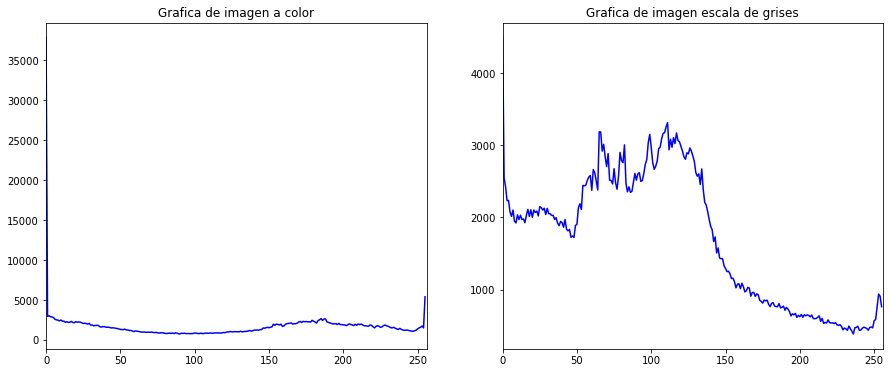

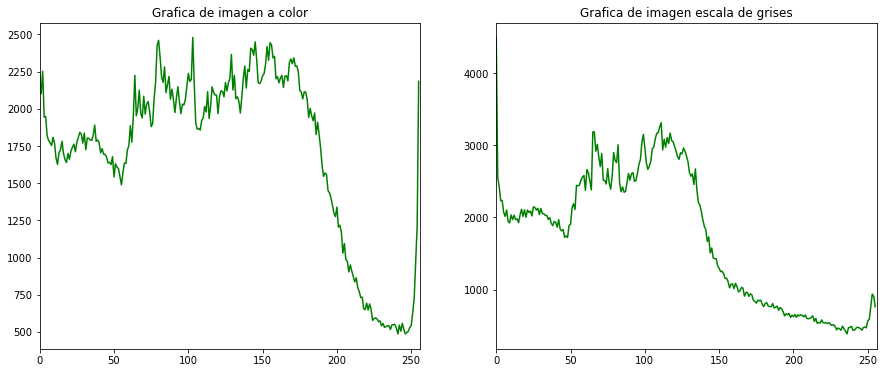

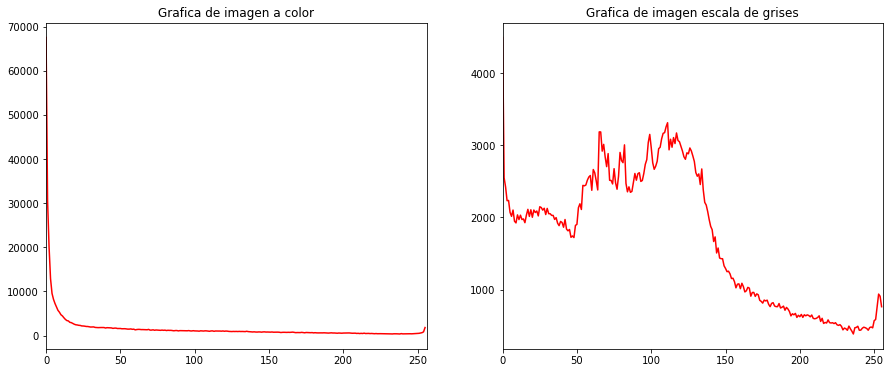

In [9]:
histograma('ej2_escala a color.jpg')

## <b> Ejercicio 5 </b>

In [10]:
def media_pond_gris(imagen):
    img =cv2.imread(imagen)
    alto = img.shape[0]
    ancho = img.shape[1]

    media_ponderada = np.zeros((alto, ancho,1)) 

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            media_ponderada[i, j] = int(np.mean(pixel))

    cv2.imwrite('ej5_gris_ponderado.jpg', media_ponderada)
    gris = cv2.imread('ej5_gris_ponderado.jpg')
    plt.imshow(gris)
    plt.show()

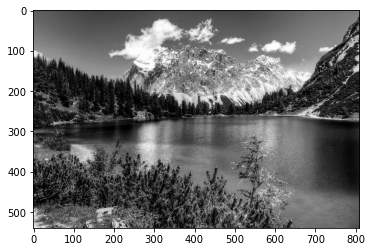

In [11]:
media_pond_gris('ej2_escala a color.jpg')

## <b> Ejercicio 6 </b>

### <b> Espacio de color HSV </b>
Es una transformación no lineal del modelo RGB en coordenadas cilíndricas.<br>
<b> Mapeo: </b> <br>
<li> <b> Tinte o matiz: </b> Ángulo que representa el matiz, normalmente definido entre grados de 0 a 360. </li>
<li> <b> Saturación: </b> Nivel saturación del color, dado entre 0 y 1, 0 representa sin saturación alguna (blanco), <br>
hasta 1 que sería el matiz en toda su intensidad. Es común también darlo en percentiles 0%-100%. </li>
<li> <b> Brillo: </b> Nivel del brillo entre 0 y 1. 0 es negro; 1, blanco. Al igual que la saturación <br>
puede darse en porcientos entre 0% y 100%. De esta forma el 50% indica el nivel medio o normal del brillo del color.  </li>

 